In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\anoop\\Downloads\\Apple_Store_Reviews (1).csv")
df

,Review_ID,App_Name,User_Age,Review_Date,Rating,Review_Text,Likes,Device_Type,Version_Used,Country,Purchase_Amount,Category
0,1,Candy Crush Saga,21,2023-01-16,4,"Great game, but too many in-game purchases.",70,iPhone 12,3.231.19,Australia,0.00,Games
1,2,Spotify,57,2024-02-01,1,"Good, but has connection issues sometimes.",49,iPhone SE,4.102.9,Germany,7.15,Music
2,3,TikTok,33,2023-11-30,5,Awesome app! Best entertainment content.,98,iPhone 12,7.52.0,Germany,4.98,Entertainment
3,4,Audible,40,2023-04-03,5,"Great app, but it's a bit pricey.",74,iPhone 13,5.260.15,Australia,0.00,Books
4,5,Spotify,44,2023-05-01,1,"Good, but has connection issues sometimes.",47,iPhone SE,4.50.18,Australia,14.31,Music
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Headspace,30,2023-11-15,3,"Good, but the premium content is expensive.",65,iPhone SE,6.284.11,US,0.00,Health
996,997,Duolingo,19,2024-09-27,1,Disappointing. Hard to follow and buggy.,4,iPhone SE,6.293.8,Canada,7.25,Education
997,998,Duolingo,38,2023-06-07,5,Excellent for learning new skills!,85,iPhone 11,10.277.15,Mexico,13.33,Education
998,999,Instagram,52,2024-03-04,4,"Great app, but sometimes it lags.",55,iPhone 13,3.52.20,US,6.37,Social


In [7]:
df.head

<bound method NDFrame.head of      Review_ID          App_Name  User_Age Review_Date  Rating  \
0            1  Candy Crush Saga        21  2023-01-16       4   
1            2           Spotify        57  2024-02-01       1   
2            3            TikTok        33  2023-11-30       5   
3            4           Audible        40  2023-04-03       5   
4            5           Spotify        44  2023-05-01       1   
..         ...               ...       ...         ...     ...   
995        996         Headspace        30  2023-11-15       3   
996        997          Duolingo        19  2024-09-27       1   
997        998          Duolingo        38  2023-06-07       5   
998        999         Instagram        52  2024-03-04       4   
999       1000           Audible        25  2024-02-20       2   

                                     Review_Text  Likes Device_Type  \
0    Great game, but too many in-game purchases.     70   iPhone 12   
1     Good, but has connection issu

In [9]:
#Calculate Mean, Median, and Mode of App Ratings:

In [11]:
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
mode_rating = df['Rating'].mode()[0]

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")


Mean Rating: 2.869
Median Rating: 3.0
Mode Rating: 1


In [13]:
#Find Range and Interquartile Range (IQR) of Purchase Amount:

In [15]:
range_purchase = df['Purchase_Amount'].max() - df['Purchase_Amount'].min()
Q1 = df['Purchase_Amount'].quantile(0.25)
Q3 = df['Purchase_Amount'].quantile(0.75)
IQR = Q3 - Q1

print(f"Range of Purchase Amount: {range_purchase}")
print(f"Interquartile Range (IQR) of Purchase Amount: {IQR}")


Range of Purchase Amount: 19.97
Interquartile Range (IQR) of Purchase Amount: 10.192499999999999


In [17]:
#Calculate Variance and Standard Deviation for Number of Likes:

In [19]:
variance_likes = df['Likes'].var()
std_dev_likes = df['Likes'].std()

print(f"Variance of Likes: {variance_likes}")
print(f"Standard Deviation of Likes: {std_dev_likes}")


Variance of Likes: 822.8546786786786
Standard Deviation of Likes: 28.685443672334557


In [21]:
# Determine Correlation Between Likes and Rating:



In [23]:
correlation = df['Likes'].corr(df['Rating'])
print(f"Correlation between Likes and Rating: {correlation}")


Correlation between Likes and Rating: 0.8425414470584177


In [25]:
# Plot Distribution of App Ratings:

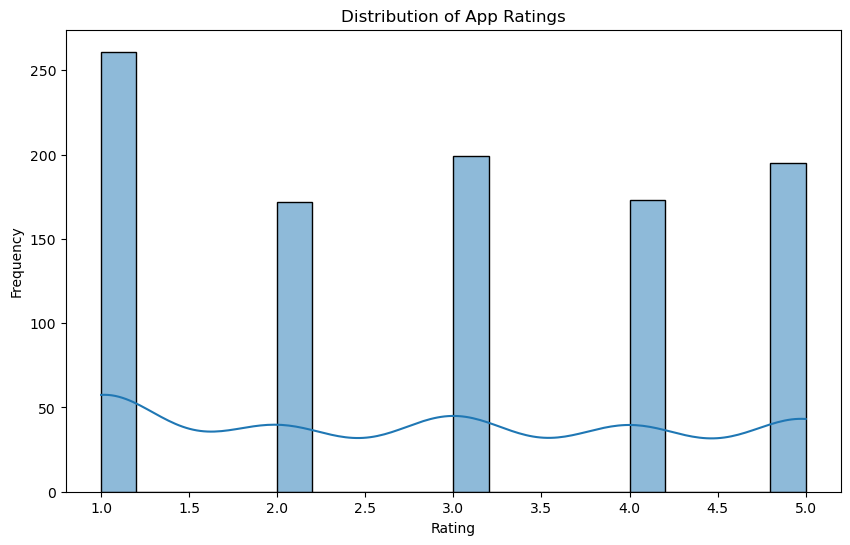

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [29]:
# Hypothesis Test: Average Rating of Instagram vs. WhatsApp:

In [33]:
print(df.columns)


Index(['Review_ID', 'App_Name', 'User_Age', 'Review_Date', 'Rating',
       'Review_Text', 'Likes', 'Device_Type', 'Version_Used', 'Country',
       'Purchase_Amount', 'Category'],
      dtype='object')


In [35]:
from scipy.stats import ttest_ind

instagram_ratings = df[df['App_Name'] == 'Instagram']['Rating']
whatsapp_ratings = df[df['App_Name'] == 'WhatsApp']['Rating']

t_stat, p_value = ttest_ind(instagram_ratings, whatsapp_ratings, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -0.7968909457614618
P-value: 0.4263936403323453


In [37]:
# Sampling Distribution and Central Limit Theorem:



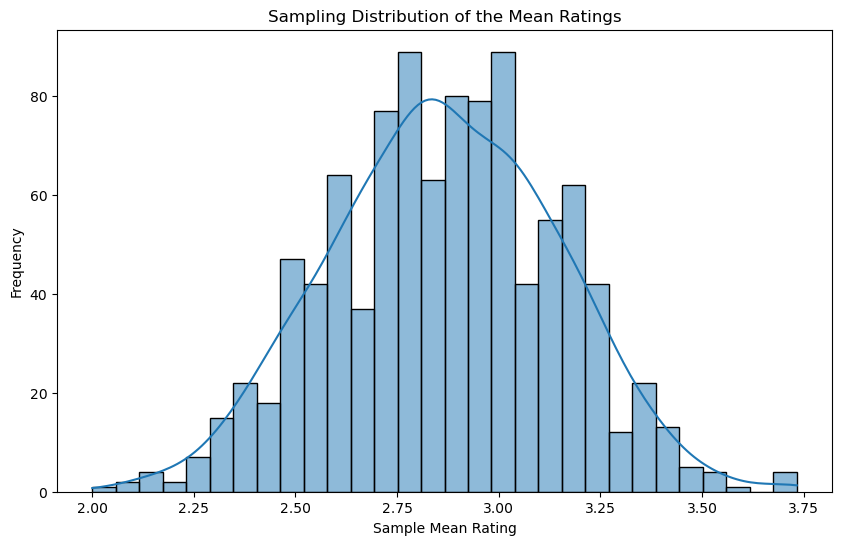

In [39]:
import numpy as np

sample_means = []
sample_size = 30
num_samples = 1000

for _ in range(num_samples):
    sample = np.random.choice(df['Rating'], size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True)
plt.title('Sampling Distribution of the Mean Ratings')
plt.xlabel('Sample Mean Rating')
plt.ylabel('Frequency')
plt.show()
